## Machine Learning Online Class - Exercise 1: Linear Regression

###  Instructions ###
  ------------

  This file contains code that helps you get started on the
  linear exercise. You will need to complete the following functions
  in this exericse:

     warmUpExercise.m
     plotData.m
     gradientDescent.m
     computeCost.m
     gradientDescentMulti.m
     computeCostMulti.m
     featureNormalize.m
     normalEqn.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

 x refers to the population size in 10,000s
 y refers to the profit in $10,000s


 Initialization
 clear ; close all; clc


#### ==================== Part 1: Basic Function ====================

In [1]:
from warmUpExercise import *
print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')
A = warmUpExercise()
print('Program paused. Press enter to continue.\n')
print(A)

Running warmUpExercise ... 

5x5 Identity Matrix: 

Program paused. Press enter to continue.

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


#### ======================= Part 2: Plotting =======================

Plotting Data ...



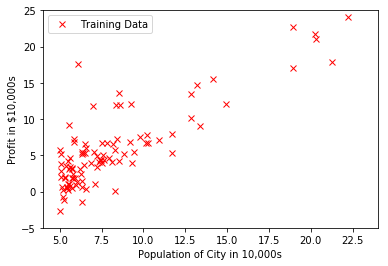

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

print('Plotting Data ...\n')
data = np.loadtxt('ex1data1.txt',dtype='float',delimiter=',');
X = data[:, 0] 
y = data[:, 1]
m = np.shape(y)[0]; # number of training examples

def plot_ex1Data(X, y):
    # Plot Data
    # Note: You have to complete the code in plotData.m
    fig, ax = plt.subplots()

    plotPoints = ax.plot(X, y, 'rx', markersize=6, label='Training Data');
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.axis([4, 24, -5, 25]);
    return ax, plotPoints;
        
ax, plotPoints = plot_ex1Data(X, y);
ax.legend(scatterpoints=1);

#### =================== Part 3: Cost and Gradient descent ===================

In [3]:
%%writefile computeCost.py
import numpy as np

def computeCost(X, y, theta):
    #COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = np.shape(y)[0]; # number of training examples

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    squaredErrorTerm = np.square((np.dot(X, theta) - np.vstack(y)));
    J = np.sum(squaredErrorTerm)/(2*m);
    return J

Overwriting computeCost.py


In [4]:
from computeCost import *

m = np.shape(y)[0]; # number of training examples
X = np.concatenate((np.ones((m,1)), np.vstack(data[:,0])), axis=1) # Add a column of ones to x
theta = np.zeros((2, 1)); # initialize fitting parameters

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(X, y, theta);
print('With theta = [0, 0]\nCost computed = {0:8.2f}\n' .format(J));
print('Expected cost value (approx) 32.07\n');

# further testing of the cost function
J = computeCost(X, y, [-1, 2]);
print("\nWith theta = [-1, 2]\nCost computed = {0:8.2f}\n" .format(J));
print('Expected cost value (approx) 54.24\n');



Testing the cost function ...

With theta = [0, 0]
Cost computed =    32.07

Expected cost value (approx) 32.07


With theta = [-1, 2]
Cost computed =  8691.96

Expected cost value (approx) 54.24



In [5]:
%%writefile gradientDescent.py
import numpy as np;
from computeCost import * 
 
def gradientDescent(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    #   taking num_iters gradient steps with learning rate alpha
 
    # Initialize some useful values
    m = np.shape(y)[0]; # number of training examples
    n = np.shape(X)[1]; # number of features

    J_history = np.zeros((num_iters, ));
 
    for iter in range(num_iters):
         # ====================== YOUR CODE HERE ======================
        #  Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.
        #
        errorTerm = np.dot(X, theta) - np.vstack(y);
        theta = theta - alpha * np.vstack((np.sum(np.repeat(errorTerm, n, axis=1)*X, 0)/m));
        # ============================================================
 
        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta);
    
    return theta, J_history

Overwriting gradientDescent.py


In [6]:
from gradientDescent import *

print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:\n');
print('{0}\n'.format(theta));
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');


Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]

Expected theta values (approx)

 -3.6303
  1.1664




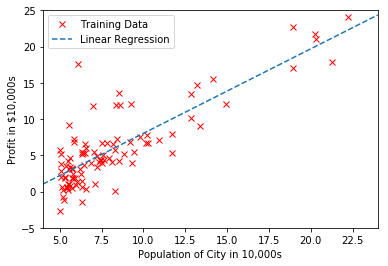

In [7]:
ax1, plotPoints = plot_ex1Data(X, y);
intercept = theta[0];
slope = theta[1];

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    abLine = plt.plot(x_vals, y_vals, '--', label="Linear Regression")
    return abLine
    
abLine = abline(slope, intercept);
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[handles[0], handles[2]], labels=[labels[0], labels[2]]);

In [8]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta);
print('For population = 35,000, we predict a profit of {0:8.2f}\n' .format(predict1[0]*10000));
predict2 = np.dot([1, 7], theta);
print('For population = 70,000, we predict a profit of {0:8.2f}\n' .format(predict2[0]*10000));

For population = 35,000, we predict a profit of  4519.77

For population = 70,000, we predict a profit of 45342.45



#### ============= Part 4: Visualizing J(theta_0, theta_1) =============

Visualizing J(theta_0, theta_1) ...



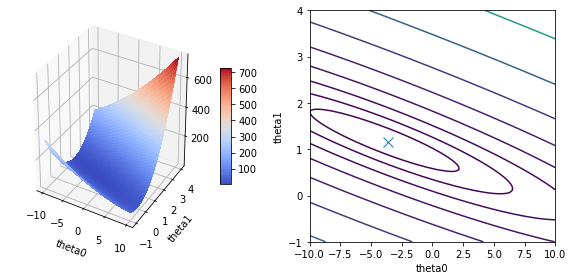

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib import cm

print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((np.shape(theta0_vals)[0], np.shape(theta1_vals)[0]));

# Fill out J_vals
for i in range(np.shape(theta0_vals)[0]):
    for j in range(np.shape(theta1_vals)[0]):
        t = np.vstack([theta0_vals[i], theta1_vals[j]]);
        J_vals[i,j] = computeCost(X, y, t);

xs, ys = np.meshgrid(np.vstack(theta0_vals), np.vstack(theta1_vals))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = np.transpose(J_vals);

# Surface plot

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Plot the surface.
surf = ax.plot_surface(xs, ys, J_vals, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel("theta0")
plt.ylabel("theta1")
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)

# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax.contour(xs, ys, J_vals, np.logspace(-2, 3, 20));
plt.xlabel("theta0")
plt.ylabel("theta1")

ax.plot(theta[0], theta[1], marker='x', markersize=10, linewidth=2);

fig.tight_layout() 

##  Exercise 1: Linear regression with multiple variables


  Instructions
  ------------
 
  This file contains code that helps you get started on the
  linear regression exercise. 

  You will need to complete the following functions in this 
  exericse:

     warmUpExercise.m
     plotData.m
     gradientDescent.m
     computeCost.m
     gradientDescentMulti.m
     computeCostMulti.m
     featureNormalize.m
     normalEqn.m

  For this part of the exercise, you will need to change some
  parts of the code below for various experiments (e.g., changing
  learning rates).
  

#### ================ Part 1: Feature Normalization ================

In [10]:
import numpy as np

print('Loading data ...\n');

# Load Data
data = np.loadtxt('ex1data2.txt',dtype='float',delimiter=',');
X = data[:, [0,1]];
y = data[:, 2];
m = np.shape(y)[0];
print('...Done')

Loading data ...

...Done


In [11]:
%%writefile featureNormalize.py
import numpy as np;

def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    # You need to set these values correctly

    X_norm = X;
    mu = np.zeros((1, np.shape(X)[1]));
    sigma = np.zeros((1, np.shape(X)[1]));

    # ====================== YOUR CODE HERE ======================
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #
    #               Note that X is a matrix where each column is a 
    #               feature and each row is an example. You need 
    #               to perform the normalization separately for 
    #               each feature. 
    #
    # Hint: You might find the 'mean' and 'std' functions useful.
    #       
    mu = np.mean(X, axis=0);
    sigma = np.std(X, axis=0, ddof=1);
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

Overwriting featureNormalize.py


In [12]:
from featureNormalize import *

# Print out some data points
print('First 10 examples from the dataset: \n');
for i in np.arange(0,9):
    print(' X = [{0:8.0f} {1:8.0f}], y = {2:8.0f}'.format(X[i,0], X[i,1], y[i]));

# Scale features and set them to zero mean
print('Normalizing Features ...\n');

X_norm, mu, sigma = featureNormalize(X);

# Add intercept term to X
m = np.shape(X_norm)[0];
X_norm = np.concatenate((np.ones((m,1)), X_norm), axis=1) # Add a column of ones to x

First 10 examples from the dataset: 

 X = [    2104        3], y =   399900
 X = [    1600        3], y =   329900
 X = [    2400        3], y =   369000
 X = [    1416        2], y =   232000
 X = [    3000        4], y =   539900
 X = [    1985        4], y =   299900
 X = [    1534        3], y =   314900
 X = [    1427        3], y =   198999
 X = [    1380        3], y =   212000
Normalizing Features ...



#### ================ Part 2: Gradient Descent ================

 ====================== YOUR CODE HERE ======================
 
 Instructions: We have provided you with the following starter
               code that runs gradient descent with a particular
               learning rate (alpha). 

               Your task is to first make sure that your functions - 
               computeCost and gradientDescent already work with 
               this starter code and support multiple variables.

               After that, try running gradient descent with 
               different values of alpha and see which one gives
               you the best result.

               Finally, you should complete the code at the end
               to predict the price of a 1650 sq-ft, 3 br house.

 Hint: By using the 'hold on' command, you can plot multiple
       graphs on the same figure.

 Hint: At prediction, make sure you do the same feature normalization.



In [13]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    theta, J_history = gradientDescent(X, y, theta, alpha, num_iters);
    return theta, J_history;

In [14]:
print('Running gradient descent ...\n');

# Choose some alpha value
alpha = 0.004;
num_iters = 4000;

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1));
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters);

# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(' {0}'.format(theta));
print('\n');

Running gradient descent ...

Theta computed from gradient descent: 

 [[ 340412.62247571]
 [ 109397.3104941 ]
 [  -6527.86887999]]




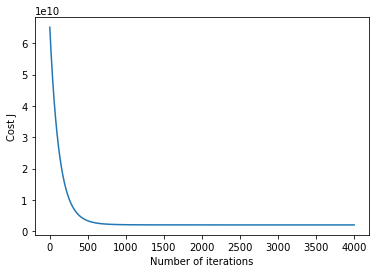

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# Plot the convergence graph
fig, ax = plt.subplots()
x_iterations = np.arange(1,np.shape(J_history)[0]+1)
plotPoints = ax.plot(x_iterations, J_history);
plt.xlabel("Number of iterations");
plt.ylabel("Cost J");

#### Estimate the price of a 1650 sq-ft, 3 br house

In [16]:
# ====================== YOUR CODE HERE ======================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
x_ex = [1, 1650, 3];
x_ex_norm = x_ex;
x_ex_norm[1:] = (x_ex[1:] - mu) / sigma;
price = np.dot(x_ex_norm, theta); # You should change this
# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house ' + 
         '(using gradient descent):\n ${0:8.2f}\n'. format(price[0]));


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293092.53



#### ================ Part 3: Normal Equations ================

 ====================== YOUR CODE HERE ======================
 
 Instructions: The following code computes the closed form 
               solution for linear regression using the normal
               equations. You should complete the code in 
               normalEqn.m

               After doing so, you should complete this code 
               to predict the price of a 1650 sq-ft, 3 br house.


In [17]:
%%writefile normalEqn.py
import numpy as np
from numpy.linalg import inv

def normalEqn(X, y):
    #NORMALEQN Computes the closed-form solution to linear regression 
    #   NORMALEQN(X,y) computes the closed-form solution to linear 
    #   regression using the normal equations.
    theta = np.zeros((np.shape(X)[1], 1));
    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the code to compute the closed form solution
    #               to linear regression and put the result in theta.
    #
    # ---------------------- Sample Solution ----------------------
    theta = np.dot(np.dot(inv(np.dot(np.transpose(X), X)), np.transpose(X)), np.vstack(y));
    return theta

Overwriting normalEqn.py


In [18]:
from normalEqn import *

print('Solving with normal equations...\n');

# Load Data
print('Loading data ...\n');
data = np.loadtxt('ex1data2.txt',dtype='float',delimiter=',');
X = data[:, [0,1]];
y = data[:, 2];
m = np.shape(y)[0];
print('...Done\n')

# Add intercept term to X
X = np.concatenate((np.ones((m,1)), X), axis=1) # Add a column of ones to x

# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: ');
print(' {0} \n' .format(theta));
print('\n');

Solving with normal equations...

Loading data ...

...Done

Theta computed from the normal equations: 
 [[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]] 





In [19]:
# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
x_ex = [1, 1650, 3];
price = np.dot(x_ex, theta); # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house ' +
         '(using normal equations):\n ${0:8.2f}\n'.format(price[0]));

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.46

